<Axes: ylabel='HTHG Categories'>

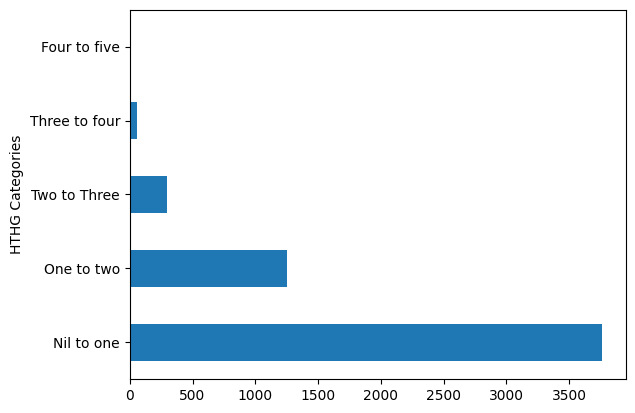

In [33]:
import pandas as pd
import numpy as np
import matplotlib as plot
import matplotlib.pyplot as plt

data = pd.read_csv('LaLiga_Matches.csv', delimiter=',', encoding='utf-8')


#Deleting duplicates and all rows that contain a missing value

data1 = data.dropna()
data1.drop_duplicates()

data.info


# The data does not have continuous numeric data but we can sort HTGH (Home Team Halftime Goals) to bins for categorization.
# After sorting we can form a graph using matplotlib to visualize the outcome for analyzation.
# You could argue that the results are poinless but this is just to show that we are able to utilize bins and labels to categorize our data if necessary.

bins = [0,1,2,3,4,5]
labels = [ "Nil to one", "One to two","Two to Three","Three to four" ,"Four to five"]


data['HTHG Categories'] = pd.cut(data["HTHG"],bins, labels = labels)



data['HTHG Categories'].value_counts().plot(kind="barh")

In [34]:
data.head(4)

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HTHG Categories
0,1995-96,02-09-1995,La Coruna,Valencia,3,0,H,2.0,0.0,H,One to two
1,1995-96,02-09-1995,Sp Gijon,Albacete,3,0,H,3.0,0.0,H,Two to Three
2,1995-96,03-09-1995,Ath Bilbao,Santander,4,0,H,2.0,0.0,H,One to two
3,1995-96,03-09-1995,Ath Madrid,Sociedad,4,1,H,1.0,1.0,D,Nil to one


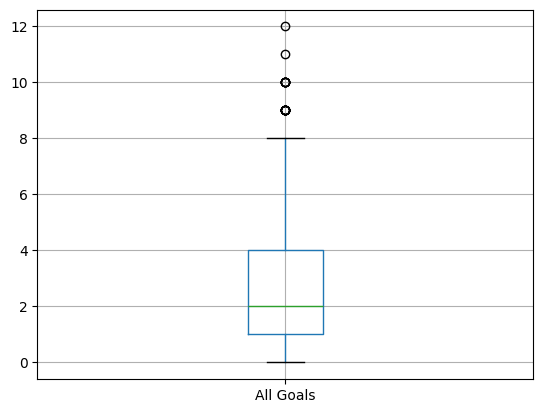

<Axes: ylabel='All Goals'>

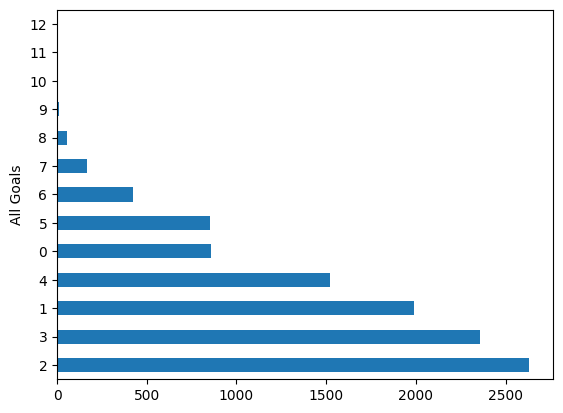

In [35]:
# Identify any outliers within your dataset. If the dataset does not include any outlier, you can randomly mess up some portion of your data.

#Here we have tried to detect some outliers from column "All Goals" which we have created to sum up all the goals made in a match.
#It seems that we have found some outliers and the plots created will show these outliers as dots in the boxplot.

goalList=["FTHG", "FTAG"]

data["All Goals"] = data[goalList].sum(axis=1)

data.boxplot(column="All Goals")


plt.show()
data["All Goals"].value_counts().plot(kind="barh")



#The outliers in goal ammount are not removed or altered since they are correct and they will not corrupt or denormalize the data in question.
#No impossible outcome in goal ammounts is found.
#These outliers simply reside outside the whiskers shown in the boxplot.


Data Objects & Attribute Types + Mean / Kalle

In [36]:
# Nominal Attributes
columns_to_print = ['Season', 'HomeTeam', 'AwayTeam', 'FTR', 'HTR']

# Showing the first 5 rows of data using only nominal attributes.
data1[columns_to_print].head(5)

# All of the attributes represent categories without inherent order.

,Season,HomeTeam,AwayTeam,FTR,HTR
0,1995-96,La Coruna,Valencia,H,H
1,1995-96,Sp Gijon,Albacete,H,H
2,1995-96,Ath Bilbao,Santander,H,H
3,1995-96,Ath Madrid,Sociedad,H,D
4,1995-96,Celta,Compostela,A,D


In [37]:
# Numeric Attributes

columns_to_print = ['FTHG', 'FTAG', 'HTHG', 'HTAG']

# Showing the first 5 rows of data using only numeric attributes.
data1[columns_to_print].head(5)

# All the mathematical operations are applicable on these attributes.

,FTHG,FTAG,HTHG,HTAG
0,3,0,2.0,0.0
1,3,0,3.0,0.0
2,4,0,2.0,0.0
3,4,1,1.0,1.0
4,0,1,0.0,0.0


In [38]:
# Mean

# FTHG and FTAG combined (full time goals)
ftg = data1['FTHG'] + data1['FTAG']

# Calculating the mean of all full time goals
mean_ftg = np.mean(ftg)
print('The mean of full time goals', mean_ftg)

The mean of full time goals 2.6704347026927673


In [ ]:
# Binary Attributes

# Adding an extra column for all full time goals combined
data1['FTG'] = ftg

# Since there are no binary attributes in the current dataset..
# I decided to add an extra column to showcase what a binary attribute could look like
# 'FTGAM' stands for 'Full Time Goals Above the Mean' and it can have 'True' or 'False' as a value
data1['FTGAM'] = np.where(ftg > mean_ftg, True, False)

columns_to_print = ['FTG', 'FTGAM']
data1[columns_to_print].head(10)

In [ ]:
# Ordinal Attributes

# Since there are no good examples of ordinal attributes in our current dataset,
# I decided to add imaginary 'MatchTier' column that can have three different tiers ('A', 'B' or 'C').
# The tiers are determined by the number of goals scored in a specific match.
conditions = [
    (data1['FTG'] <= 2),
    (data1['FTG'] == 3),
    (data1['FTG'] >= 4)
]

values = ['C', 'B', 'A']

data1['MatchTier'] = np.select(conditions, values)

columns_to_print = ['FTG', 'MatchTier']
data1[columns_to_print].head(5)

# This is just to show what an ordinal attribute could look like in the context of this dataset

In [41]:
median = np.median(data1['FTHG'])
print("The median of full time home goals is: ", median)

The median of full time home goals is:  1.0


In [42]:
std_deviation = np.std(data1['FTAG'])

print("The standard deviation of full time away goals is", std_deviation)

The standard deviation of full time away goals is 1.1139185060998218


In [43]:
variance = np.var(data1['HTAG'])
print("The variance of half time away goals is", variance)

The variance of half time away goals is 0.48963631515045486


In [44]:
max_FTHG_by_season = data1.groupby('Season')['FTHG'].max()

print("Maximum FTHG for each season:")
print(max_FTHG_by_season)

Maximum FTHG for each season:
Season
1995-96       8
1996-97       8
1997-98       6
1998-99       7
1999-2000     6
2000-01       7
2001-02       7
2002-03       6
2003-04       7
2004-05       6
2005-06       5
2006-07       5
2007-08       7
2008-09       7
2009-10       6
2010-11       8
2011-12       8
2012-13       6
2013-14       7
2014-15       9
2015-16      10
2016-17       7
2017-18       7
2018-19       8
2019-20       6
2020-21       6
2021-22       6
2022-23       6
2023-24       5
Name: FTHG, dtype: int64


In [45]:
max_FTAG_by_season = data1.groupby('Season')['FTAG'].max()

print("Maximum FTAG for each season:")
print(max_FTAG_by_season)

Maximum FTAG for each season:
Season
1995-96      8
1996-97      5
1997-98      6
1998-99      5
1999-2000    5
2000-01      6
2001-02      6
2002-03      5
2003-04      6
2004-05      6
2005-06      4
2006-07      6
2007-08      5
2008-09      6
2009-10      5
2010-11      8
2011-12      7
2012-13      5
2013-14      5
2014-15      8
2015-16      8
2016-17      6
2017-18      6
2018-19      6
2019-20      5
2020-21      6
2021-22      6
2022-23      5
2023-24      7
Name: FTAG, dtype: int64


In [46]:
max_value = np.max(data1['FTHG'])
print("The max value of full time home goals is", max_value)

The max value of full time home goals is 10


In [47]:
max_value = np.max(data1['FTAG'])
print("The max value of full time away goals is", max_value)

The max value of full time away goals is 8


In [48]:
desired_season = '2016-17'

max_FTHG_for_season = data1[data1['Season'] == desired_season]['FTHG'].max()

print("max FTHG for desired season:", max_FTHG_for_season)

max FTHG for desired season: 7


In [49]:
min_value = np.min(data1['FTHG'])
print("The min value of full time home goals is", min_value)

The min value of full time home goals is 0


In [50]:
min_value = np.min(data1['FTAG'])
print("The min value of full time away goals is", min_value)

The min value of full time away goals is 0


In [51]:
sum_home_full_time_goals = np.sum(data1['FTHG'])
print("The sum of FTHG is", sum_home_full_time_goals)

The sum of FTHG is 16904


In [52]:
sum_away_full_time_goals = np.sum(data1['FTAG'])
print("The sum of FTAG is", sum_away_full_time_goals)

The sum of FTAG is 12153


In [53]:
desired_season1 = '2013-14'
filtered_data = data1[data1['Season'] == desired_season1]
print(filtered_data)
product_result = filtered_data['FTHG'].prod()
print("Product:", product_result)

       Season        Date    HomeTeam    AwayTeam  FTHG  FTAG FTR  HTHG  HTAG  \
7004  2013-14  17-08-2013    Sociedad      Getafe     2     0   H   1.0   0.0   
7005  2013-14  17-08-2013    Valencia      Malaga     1     0   H   0.0   0.0   
7006  2013-14  17-08-2013  Valladolid  Ath Bilbao     1     2   A   1.0   1.0   
7007  2013-14  18-08-2013   Barcelona     Levante     7     0   H   6.0   0.0   
7008  2013-14  18-08-2013     Osasuna     Granada     1     2   A   0.0   2.0   
...       ...         ...         ...         ...   ...   ...  ..   ...   ...   
7379  2013-14  18-05-2014     Osasuna       Betis     2     1   H   2.0   0.0   
7380  2013-14  18-05-2014     Sevilla       Elche     3     1   H   1.0   0.0   
7381  2013-14  18-05-2014    Sociedad  Villarreal     1     2   A   0.0   1.0   
7382  2013-14  18-05-2014  Valladolid     Granada     0     1   A   0.0   1.0   
7383  2013-14  18-05-2014   Vallecano      Getafe     1     2   A   0.0   1.0   

     HTR  FTG  FTGAM MatchT

Product on nolla, koska joku FTHG arvoista on kyseisellä kaudella nolla. Eli joukkue ei ole tehnyt yhtään maalia ja kun muut arvot kerrotaan nollalla on tulo nolla.

Tuomaksen koodit visualisoinnista:
1. Line Plot
2. Scatter Plot
3. Bar Chart
4. Histogram

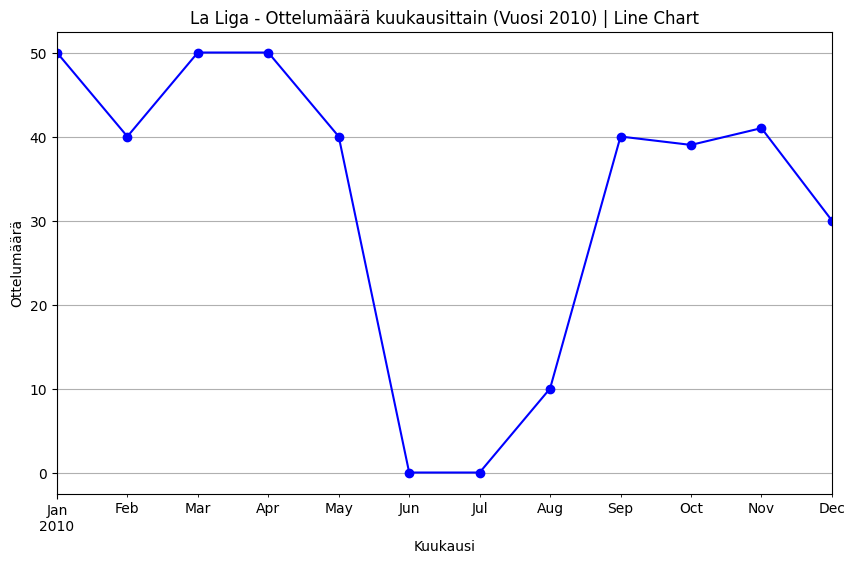

In [54]:
#LINE CHART

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('LaLiga_Matches.csv', delimiter=',', encoding='utf-8')
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

filtered_data = data[data['Date'].dt.year == 2010]

ottelut_kuukausittain = filtered_data.resample('M', on='Date').size()

plt.figure(figsize=(10, 6))
ottelut_kuukausittain.plot(marker='o', linestyle='-', color='b')
plt.title('La Liga - Ottelumäärä kuukausittain (Vuosi 2010) | Line Chart')
plt.xlabel('Kuukausi')
plt.ylabel('Ottelumäärä')
plt.grid(True)
plt.show()

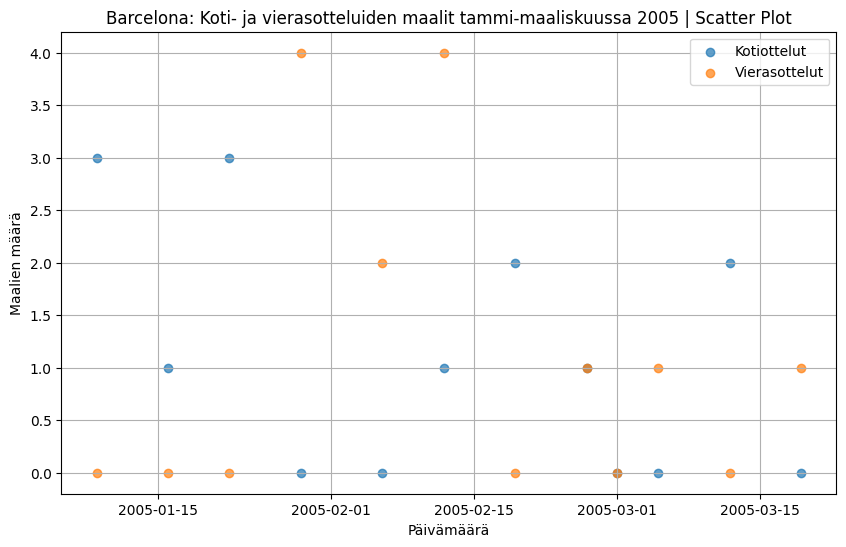

In [55]:
#SCATTER PLOT

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('LaLiga_Matches.csv', delimiter=',', encoding='utf-8')
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

barcelona_data = data[(data['HomeTeam'] == 'Barcelona') | (data['AwayTeam'] == 'Barcelona')]
barcelona_data = barcelona_data[(barcelona_data['Date'].dt.year == 2005) & (barcelona_data['Date'].dt.month <= 3)]

plt.figure(figsize=(10, 6))
plt.scatter(barcelona_data['Date'], barcelona_data['FTHG'], label='Kotiottelut', alpha=0.7)
plt.scatter(barcelona_data['Date'], barcelona_data['FTAG'], label='Vierasottelut', alpha=0.7)
plt.title('Barcelona: Koti- ja vierasotteluiden maalit tammi-maaliskuussa 2005 | Scatter Plot')
plt.xlabel('Päivämäärä')
plt.ylabel('Maalien määrä')
plt.legend()
plt.grid(True)
plt.show()

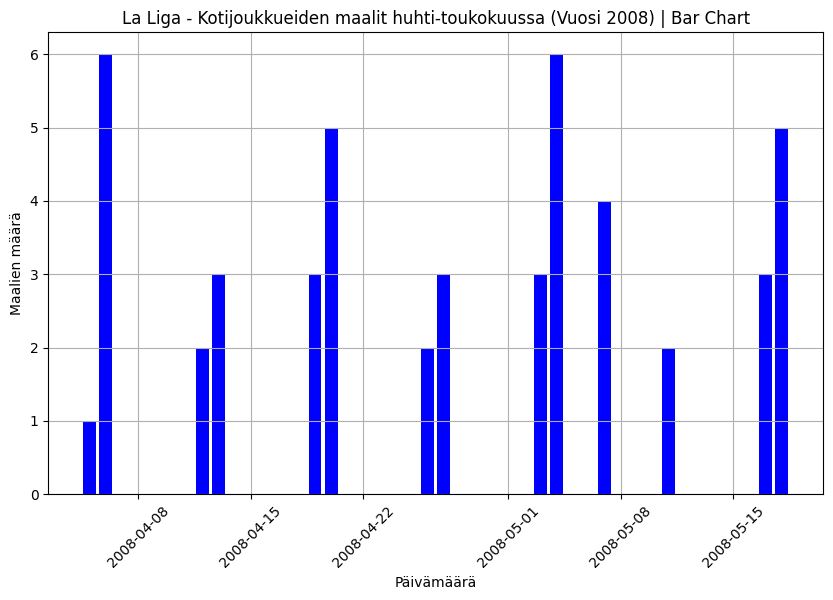

In [56]:
#BAR CHART

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('LaLiga_Matches.csv', delimiter=',', encoding='utf-8')
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

filtered_data = data[(data['Date'].dt.year == 2008) & (data['Date'].dt.month.isin([4, 5]))]

plt.figure(figsize=(10, 6))
plt.bar(filtered_data['Date'], filtered_data['FTHG'], color='blue')
plt.title('La Liga - Kotijoukkueiden maalit huhti-toukokuussa (Vuosi 2008) | Bar Chart')
plt.xlabel('Päivämäärä')
plt.ylabel('Maalien määrä')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

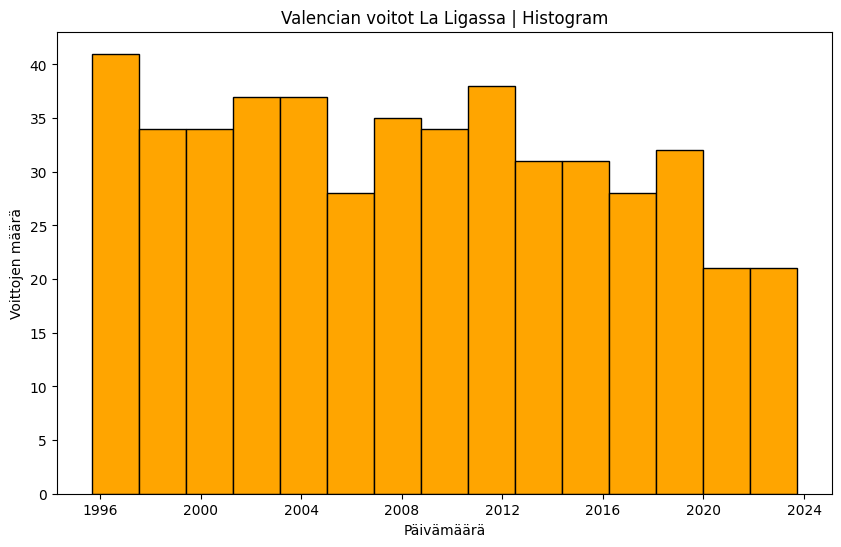

In [57]:
#HISTOGRAM

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('LaLiga_Matches.csv', delimiter=',', encoding='utf-8')
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

valencia_wins = data[(data['HomeTeam'] == 'Valencia') & (data['FTR'] == 'H') | (data['AwayTeam'] == 'Valencia') & (data['FTR'] == 'A')]

plt.figure(figsize=(10, 6))
plt.hist(valencia_wins['Date'], bins=15, color='orange', edgecolor='black')
plt.title('Valencian voitot La Ligassa | Histogram')
plt.xlabel('Päivämäärä')
plt.ylabel('Voittojen määrä')
plt.show()

Samuelin koodit

Pie Chart

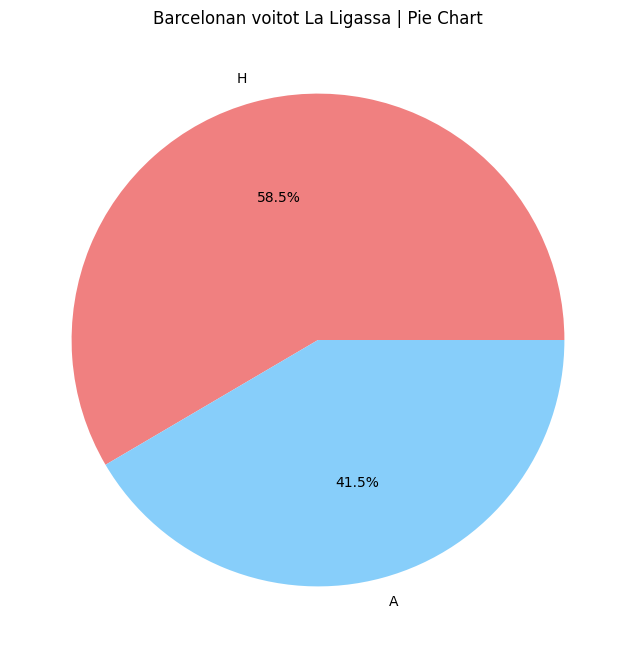

In [58]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('LaLiga_Matches.csv', delimiter=',', encoding='utf-8')
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')


barcelona_wins = data[(data['HomeTeam'] == 'Barcelona') & (data['FTR'] == 'H') | (data['AwayTeam'] == 'Barcelona') & (data['FTR'] == 'A')]


result_counts = barcelona_wins['FTR'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue', 'lightgreen'])
plt.title('Barcelonan voitot La Ligassa | Pie Chart')
plt.show()


HeatMap

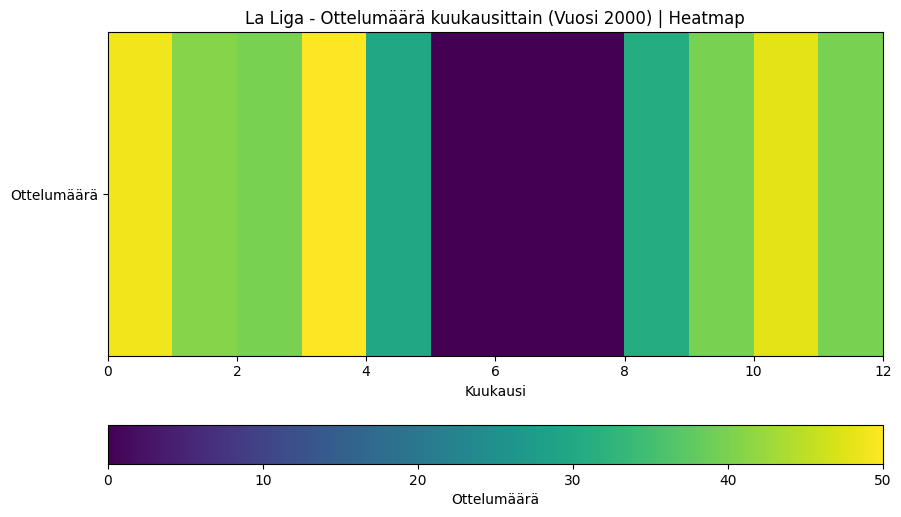

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('LaLiga_Matches.csv', delimiter=',', encoding='utf-8')
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

filtered_data = data[data['Date'].dt.year == 2000]


ottelut_kuukausittain = filtered_data.resample('M', on='Date').size()


fig, ax = plt.subplots(figsize=(10, 6))
heatmap = ax.imshow([ottelut_kuukausittain.values], cmap='viridis', aspect='auto', extent=[0, 12, 0, 1])


ax.set_title('La Liga - Ottelumäärä kuukausittain (Vuosi 2000) | Heatmap')
ax.set_xlabel('Kuukausi')
ax.set_yticks([0.5])
ax.set_yticklabels(['Ottelumäärä'])


cbar = plt.colorbar(heatmap, orientation='horizontal')
cbar.set_label('Ottelumäärä')

plt.show()


3D Plot

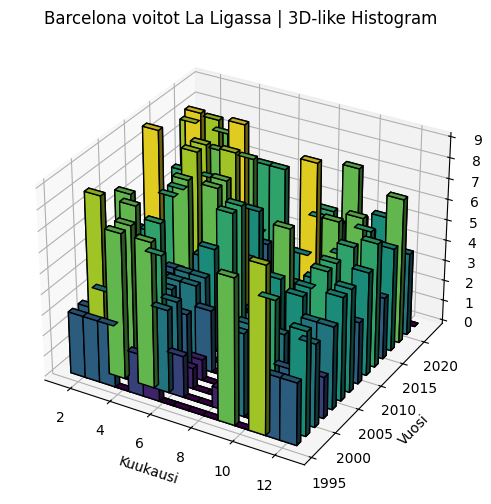

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Load data and process the date field
data = pd.read_csv('LaLiga_Matches.csv', delimiter=',', encoding='utf-8')
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Filter necessary data (Barcelona wins)
barcelona_wins = data[(data['HomeTeam'] == 'Barcelona') & (data['FTR'] == 'H') | (data['AwayTeam'] == 'Barcelona') & (data['FTR'] == 'A')]

# Create a 3D-like subplot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D-like histogram
hist, xedges, yedges = np.histogram2d(barcelona_wins['Date'].dt.month, barcelona_wins['Date'].dt.year, bins=(15, 15))
xpos, ypos = np.meshgrid(xedges[:-1] + 0.5, yedges[:-1] + 0.5, indexing="ij")

xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros_like(xpos)

dx = dy = 0.8  # Adjust the width and height of the bars

dz = hist.flatten()

# Create a colormap based on the number of wins
colors = plt.cm.viridis(dz / dz.max())

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=colors, edgecolor='black')

# Title
ax.set_title('Barcelona voitot La Ligassa | 3D-like Histogram')
ax.set_xlabel('Kuukausi')
ax.set_ylabel('Vuosi')
ax.set_zlabel('Voittojen määrä')


plt.show()
